In [7]:
import pandas as pd
df = pd.read_excel('../../data/CleanedStatements/fully_catized_encoded.xlsx')
import nltk
import re
import spacy
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
# from contractions import CONTRACTION_MAP
import unicodedata

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [9]:
# nlp = spacy.load('en_core_web_lg')

In [10]:
# Find below my suggestions:

# 1. Consider the frequency of words, remove any words that occur less than 5 or 10 times,
# this helps us get rid of unique words that are not used frequently, this way our model 
# will not focus on those words.

# 2. W.r.t the above point, try removing the words that are too frequent like the one that 
# occurs more then 100-120 times, this gets rid of the higher frequency words. These 
# threshold values are configurable and solely depends on the use case, there is no right or 
# wrong way to do it.

# 3. Try removing Stop words.

# 4. Try Lemmatisation, it is recommended you experiment with the Lemmatisation after stop 
# words removal and then try the frequency removal method.

# Try these methods and let me know if it worked for you, if not feel free to reach out in 
# the response section, I’ll try to respond sooner.

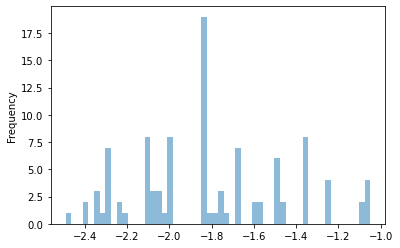

In [13]:
df[(-2.5<df['Amount']) & (df['Amount']<-1)]['Amount'].plot.hist(bins=54,alpha=0.5)
import matplotlib.pyplot as plt

# # Creating histogram
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist(df[(-40<df['Amount']) & (df['Amount']<-3)]['Amount'], bins = [0, 25, 50, 75, 100])
  
# # Show plot
# plt.show()

<AxesSubplot:>

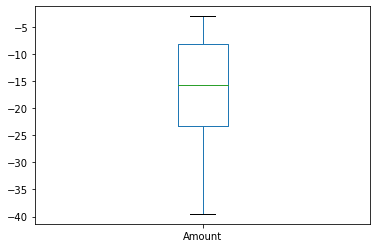

In [13]:
df[(-40<df['Amount']) & (df['Amount']<-3)]['Amount'].plot.box()

In [14]:
import seaborn as sns

/Users/colemanwalterj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


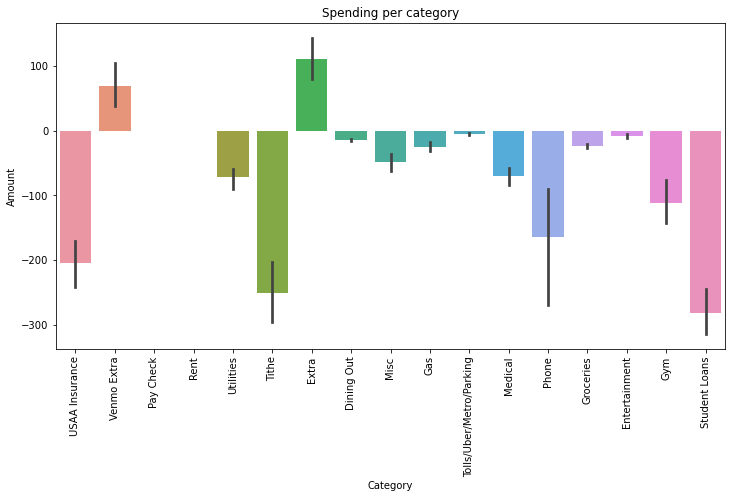

In [15]:
fig = plt.subplots(figsize=(12,6))
sns.barplot(df['Category'],df[abs(df['Amount']) < 400]['Amount'])
plt.xticks(rotation = 90) 
plt.title('Spending per category')
plt.show()

In [16]:
spends = df[df['Amount'] < 0]['Amount'].apply(lambda x: -1*x)
cats = df[df['Amount'] < 0]['Category'].copy()

In [17]:
len(spends)

680

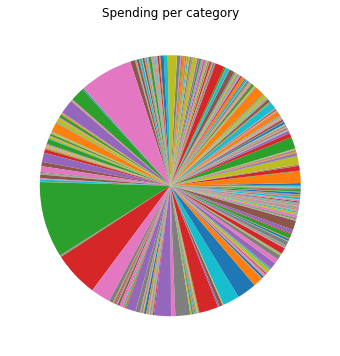

In [18]:
fig = plt.subplots(figsize=(12,6))
plt.pie(spends)
plt.xticks(rotation = 90) 
plt.title('Spending per category')
plt.show()

In [224]:
tokenizer

In [140]:
import pandas as pd
df = pd.read_excel('../data/CleanedStatements/fully_catized_encoded.xlsx')
import nltk
import re
import spacy
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from nltk.tokenize.toktok import ToktokTokenizer
# from contractions import CONTRACTION_MAP
import unicodedata

from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import OneHotEncoder
# from tensorflow.keras.preprocessing.sequence import pad_sequences

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def data_corpus_create(content):
    data_corpus=set()
    for row in content:
        for word in row.split(" "):
            if word not in data_corpus:
                data_corpus.add(word)
    return sorted(data_corpus)

lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('omw-1.4')
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

content = df['Content'].copy()

# build corpus, get count of each word
nltk.FreqDist(content[0].split(' '))

content1 = content.apply(lambda x: re.sub(r"[^a-zA-Z0-9]+", " ", x) )
content2 = content1.apply(lambda x: x.lower())
content3 = content2.apply(lambda x: x.strip())
# create corpus with frequency counts to see what can stay and what can depart
content4 = pd.Series(sorted(content3))
# Create a corpus for all the words
content5 = content4.apply(remove_stopwords)

content6 = content5.apply(lambda x: lemmatizer.lemmatize(x))
content7 = content6.apply(lambda x: re.sub("\d+","",x))
cont = content7.apply(lambda x: re.sub("  "," ",x))
cont = cont.apply(lambda x: x.strip())
cont = cont.apply(lambda x: re.sub("  "," ",x))

data_corpus = data_corpus_create(cont)

# Create dictionary for each unique word, += 1 for each new encounter
d = {}
for row in cont:
    for word in row.split(" "):
        if word not in d.keys():
            d[word] = 1
        else:
            d[word] +=1

word_freq_counts = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

ref = list(d.values())

def remove_dict_dat(sentence):
    s = sentence.split(" ")
    for word in s:
        if d[word] < 5:
            s.remove(word)
        elif d[word] > 19:
            s.remove(word)
    return " ".join(s)

cont2 = cont.apply(remove_dict_dat)

data_corpus=data_corpus_create(cont2)

cont2 = cont2.apply(lambda x: x.strip())
cont2 = cont2.apply(lambda x: lemmatizer.lemmatize(x))

# converting text to integers
token_docs = [list(set(doc.split(" "))) for doc in cont2]
all_tokens = set([word for sentence in token_docs for word in sentence])
word_to_idx = {token:idx+1 for idx, token in enumerate(all_tokens)}

# converting the docs to their token ids
X = np.array([[word_to_idx[token] for token in token_doc] for token_doc in token_docs], dtype=object)

# padding the sequences
X_padded = pad_sequences(X, padding="post")

# converting to pandas df
X_df = pd.DataFrame(X_padded)

X_df

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/colemanwalterj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/colemanwalterj/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    1    2    3    4    5    6    7
0      61  208   31    0    0    0    0    0
1      61  217  313    0    0    0    0    0
2      61  185  336    0    0    0    0    0
3      61  185  336    0    0    0    0    0
4      61  432    0    0    0    0    0    0
5      61  432    0    0    0    0    0    0
6      61  400  329    0    0    0    0    0
7     432  234    0    0    0    0    0    0
8     432  234    0    0    0    0    0    0
9     432  234    0    0    0    0    0    0
10    256    0    0    0    0    0    0    0
11    256    0    0    0    0    0    0    0
12     15  432    0    0    0    0    0    0
13    157  234    0    0    0    0    0    0
14    157  234    0    0    0    0    0    0
15    157  234    0    0    0    0    0    0
16    390  445    0    0    0    0    0    0
17    390    3  445    0    0    0    0    0
18    390  395  445    0    0    0    0    0
19    390  395  445    0    0    0    0    0
20    390  395  445    0    0    0    0    0
21    390  395  445    0    0    0    0    0
22    390  395  445    0    0    0    0    0
23    390  395  445    0    0    0    0    0
24    390  395  445    0    0    0    0    0
25    390  395  445    0    0    0    0    0
26    390  395  445    0    0    0    0    0
27    390  395  445    0    0    0    0    0
28    390  395  445    0    0    0    0    0
29    390  395  445    0    0    0    0    0
30    390  395  445    0    0    0    0    0
31    390  395  445    0    0    0    0    0
32    390  395  445    0    0    0    0    0
33    390  395  445    0    0    0    0    0
34    390  395  445    0    0    0    0    0
35    390  395  445    0    0    0    0    0
36    390  395  445    0    0    0    0    0
37    390  395  445    0    0    0    0    0
38    390  395  445    0    0    0    0    0
39    390  395  445    0    0    0    0    0
40    405  432  319    0    0    0    0    0
41    405  432  319    0    0    0    0    0
42    405  432  319    0    0    0    0    0
43    405  432  319    0    0    0    0    0
44    405  432  319    0    0    0    0    0
45    405  432  319    0    0    0    0    0
46    405  432  319    0    0    0    0    0
47    405  432  319    0    0    0    0    0
48    405  432  319    0    0    0    0    0
49    405  432  319    0    0    0    0    0
50    405  432  319    0    0    0    0    0
51    405  432  319    0    0    0    0    0
52    405  432  319    0    0    0    0    0
53    405  432  319    0    0    0    0    0
54    405  432  319    0    0    0    0    0
55    405  432  319    0    0    0    0    0
56    405  432  319    0    0    0    0    0
57    405  432  319    0    0    0    0    0
58    426  200  201  404    0    0    0    0
59    457  484  201  422    0    0    0    0
60    457  484  201  422    0    0    0    0
61    457  484  201  422    0    0    0    0
62    481    0    0    0    0    0    0    0
63    230  432    0    0    0    0    0    0
64    230  432    0    0    0    0    0    0
65    425  481    0    0    0    0    0    0
66    425  481    0    0    0    0    0    0
67    522   79  435    0    0    0    0    0
68     79  423  435    0    0    0    0    0
69    384   79  163  417    0    0    0    0
70    384   79  417    0    0    0    0    0
71    384   79  163  417    0    0    0    0
72    384   79  163  417    0    0    0    0
73    384   79  163  417    0    0    0    0
74    384   79  163  417    0    0    0    0
75    384   79  163  417    0    0    0    0
76    384   79  163  417    0    0    0    0
77    384   79  417    0    0    0    0    0
78    384   79  417    0    0    0    0    0
79    111  384  163  417    0    0    0    0
80    254  190  163  202  418    0    0    0
81    254  190  163  202  418    0    0    0
82    254  190  163  202  418    0    0    0
83    254  190  163  202  418    0    0    0
84    254  190  163  202  418    0    0    0
85    254  190  163  202  418    0    0    0
86    418  190  254  202    0    0    0    0
87    418  190  254  202    0    0    0    0
88 

In [147]:
from sklearn.preprocessing import MultiLabelBinarizer
sentences = pd.Series(token_docs)
mlb = MultiLabelBinarizer()
mlb_df = df.join(pd.DataFrame(mlb.fit_transform(sentences),columns=mlb.classes_))
mlb_df

Purchase Date Purchase Time         Payment_Method   Amount Verification Date                                                                                                               Content                  Category  VD_year  PT_total_seconds  sin_PT_total_seconds  ...  woodstock  world  wy  xi  xpress  xsport  xx  xxtaxeipirs  york  youtube
0       2021-12-28      00:00:00             Debit Card   -16.99        2021-12-28                                                     Payment to Covenant Eyes COVENANT EYES          HTTPSWWW.COVEMIUS                      Misc     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
1       2021-12-28      00:00:00             Debit Card   -30.00        2021-12-27                                                 SQ *JULIAN CharlottesvilVAUS SQ *JULIAN             CharlottesvilVAUS                Dining Out     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
2       2021-12-27      00:00:00             Debit Card   -52.45        2021-12-27                                                                       Sheetz SHEETZ 0221   00002212 BEALETON     VAUS                       Gas     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
3       2021-12-27      00:00:00             Debit Card    -2.00        2021-12-26                                              USA*CSC TEP CO GAINESVILLE VAUS USA*CSC TEP CO         GAINESVILLE  VAUS  Tolls/Uber/Metro/Parking     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
4       2021-12-26      00:00:00             Debit Card   -15.77        2021-12-26                                                                Harris Teeter HARRIS TEETER #0 975 EMCHARLOTTESVILVAUS                 Groceries     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
5       2021-12-26      00:00:00                Deposit    16.85        2021-12-26                                                                 Trader Joe's TRADER JOE'S #661 QPS  CHARLOTTESVILVAUS                     Extra     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
6       2021-12-26      00:00:00             Debit Card   -42.10        2021-12-26                                                                 Trader Joe's TRADER JOE'S #661 QPS  CHARLOTTESVILVAUS                 Groceries     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
7       2021-12-26      00:00:00             Debit Card   -46.41        2021-12-26                                                                 Trader Joe's TRADER JOE'S #661 QPS  CHARLOTTESVILVAUS                 Groceries     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
8       2021-12-26      00:00:00             Debit Card    -7.31        2021-12-26                                                                       Sheetz SHEETZ 0221            BEALETON     VAUS                Dining Out     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
9       2021-12-26      00:00:00             Debit Card    -1.50        2021-12-26                                                            Holy Grounds Cafe SQ *HOLY GROUNDS CAFE  Leesburg     VAUS                Dining Out     2021                 0          0.000000e+00  ...          0      0   0   0       0       0   0            0     0        0
10      2021-12-26      00:00:00             Debit Card    -5.49        2021-12-26                  

In [122]:
X

array([list([61, 61, 31, 208]), list([61, 61, 217, 313]),
       list([61, 61, 336, 185]), ..., list([196, 314]), list([196, 314]),
       list([112, 341, 112, 71])], dtype=object)

In [81]:
# change numeric columns to str for the transaction text
lis = []

for x in X_df.columns:
    lis.append('word'+str(x))
X_df.columns = lis

# combine original dataframe to the parameterized content dataframe
dff = pd.concat([df,X_df],axis=1)

In [88]:
# os.chdir('..')
from auto_budget import bank_functions_NWFCU as nw
ref = nw.ref_dictionaries(dff)

({'Dining Out': 0.0,
  'Entertainment': 1.0,
  'Extra': 2.0,
  'Gas': 3.0,
  'Groceries': 4.0,
  'Gym': 5.0,
  'Medical': 6.0,
  'Misc': 7.0,
  'Pay Check': 8.0,
  'Phone': 9.0,
  'Rent': 10.0,
  'Student Loans': 11.0,
  'Tithe': 12.0,
  'Tolls/Uber/Metro/Parking': 13.0,
  'USAA Insurance': 14.0,
  'Utilities': 15.0,
  'Venmo Extra': 16.0},
 {0.0: 'Dining Out',
  1.0: 'Entertainment',
  2.0: 'Extra',
  3.0: 'Gas',
  4.0: 'Groceries',
  5.0: 'Gym',
  6.0: 'Medical',
  7.0: 'Misc',
  8.0: 'Pay Check',
  9.0: 'Phone',
  10.0: 'Rent',
  11.0: 'Student Loans',
  12.0: 'Tithe',
  13.0: 'Tolls/Uber/Metro/Parking',
  14.0: 'USAA Insurance',
  15.0: 'Utilities',
  16.0: 'Venmo Extra'})

In [132]:
# just ordinal encoding, about 63% accuracy no cross-validation

# change numeric columns to str for the transaction text
lis = []

for x in X_df.columns:
    lis.append('word'+str(x))
X_df.columns = lis

# combine original dataframe to the parameterized content dataframe
dff = pd.concat([df,X_df],axis=1)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# separate predictors and response
X = dff.drop(['Purchase Date','Purchase Time','Payment_Method','Verification Date', 'Content', 'Category','PT_total_seconds','Payment_Method_Cat', 'Category_Cat', 'Content'], axis=1)
y = dff['Category_Cat'].copy()

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
predictions = dectree.predict(X_test)
sum(predictions == y_test.array) / len(predictions)

/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6589861751152074

In [117]:
# one hot encoding but with redundancy

enc = OneHotEncoder(handle_unknown ='ignore')
enc_df = pd.DataFrame(enc.fit_transform(X_df).toarray())

# change numeric columns to str for the transaction text
lis = []

for x in enc_df.columns:
    lis.append('word'+str(x))
enc_df.columns = lis

# combine original dataframe to the parameterized content dataframe
dff = pd.concat([df,enc_df],axis=1)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# separate predictors and response
X = dff.drop(['Purchase Date','Purchase Time','Payment_Method','Verification Date', 'Content', 'Category','PT_total_seconds','Payment_Method_Cat', 'Category_Cat', 'Content'], axis=1)
y = dff['Category_Cat'].copy()

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
predictions = dectree.predict(X_test)
sum(predictions == y_test.array) / len(predictions)

/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6912442396313364

In [161]:
# one hot encoding without redundancy

from sklearn.preprocessing import MultiLabelBinarizer
sentences = pd.Series(token_docs)
mlb = MultiLabelBinarizer()
mlb_df = df.join(pd.DataFrame(mlb.fit_transform(sentences),columns=mlb.classes_))

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# separate predictors and response
X = mlb_df.drop(['Purchase Date','Purchase Time','Payment_Method','Verification Date', 'Content', 'Category','PT_total_seconds','Payment_Method_Cat', 'Category_Cat', 'Content'], axis=1)
y = mlb_df['Category_Cat'].copy()

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
predictions = dectree.predict(X_test)
sum(predictions == y_test.array) / len(predictions)

/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.684331797235023

In [162]:
# no transaction words at all

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# separate predictors and response
X = df.drop(['Purchase Date','Purchase Time','Payment_Method','Verification Date', 'Content', 'Category','PT_total_seconds','Payment_Method_Cat', 'Category_Cat', 'Content'], axis=1)
y = df['Category_Cat'].copy()

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
predictions = dectree.predict(X_test)
sum(predictions == y_test.array) / len(predictions)

/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.35253456221198154

Text(0.5, 1.0, 'Comparison of datasets in decision tree')

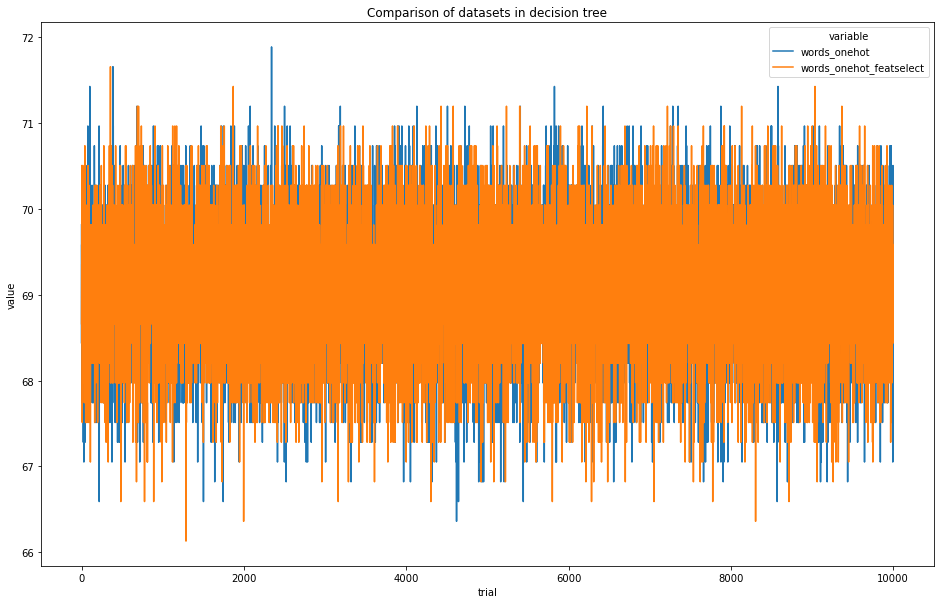

In [219]:
# figure out how to use index-based words in sklearn 
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tokenizing-text-with-scikit-learn

import seaborn as sns
import matplotlib.pyplot as plot
import warnings as w
%matplotlib inline

# supress warnings
w.filterwarnings('ignore')

num_simulations = 10000
# results = pd.DataFrame(columns=['trial','no_words','words_ordinal','words_onehot'])
results = pd.DataFrame()
dectree = DecisionTreeClassifier()

def feature_selection(X,y):
    # initial fit
    dectree.fit(X, y)
    model = SelectFromModel(dectree, prefit=True)
    X_new = model.transform(X)
    return X_new

def decision_tree_results(prepped_df, featselect=False, dectree):
    """runs split decision tree model and returns percent of matches"""
    # separate predictors and response
    X = prepped_df.drop(['Purchase Date','Purchase Time','Payment_Method','Verification Date', 'Content', 'Category','PT_total_seconds','Payment_Method_Cat', 'Category_Cat', 'Content'], axis=1)
    y = prepped_df['Category_Cat'].copy()
    
    if featselect:
        X_new = feature_selection(X, y)
    else:
        X_new = X.copy()

    # test train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # dectree = DecisionTreeClassifier()
    dectree.fit(X_train, y_train)
    predictions = dectree.predict(X_test)
    return (sum(predictions == y_test.array) / len(predictions)) * 100

# run 1,000 simulations for each dataset, and see which has the best misclassification rate

for i in range(num_simulations):
    # no_words = decision_tree_results(df)
    # words_ordinal = decision_tree_results(dff)
    words_onehot = decision_tree_results(mlb_df, dectree)
    words_onehot_featselect = decision_tree_results(mlb_df,True,dectree)
    #results = results.append({'trial':i,'no_words':no_words,'words_ordinal':words_ordinal,'words_onehot':words_onehot}, \
    #                         ignore_index=True)
    results = results.append({'trial':i,'words_onehot':words_onehot,'words_onehot_featselect':words_onehot_featselect}, \
                            ignore_index=True)

# pivot dataframe to use seaborn hue

results_melted = pd.melt(results,id_vars=['trial'])

# plot results in graph
plt.figure(figsize=(16,10))
sns.lineplot(x='trial',y='value',hue='variable',data=results_melted)
plt.title('Comparison of datasets in decision tree')

In [201]:
mlb_df[mlb_df.columns[26:]].sum()

                            5
acct                        4
ach                         6
advanced                   18
aetna                       1
afghan                      1
ah                          3
aid                         1
air                         4
airbnb                      2
alexandria                 14
amazon                      2
amzn                       19
annapolis                   1
anne                        1
ap                          1
app                         1
apple                       6
aramark                    19
arby                        6
arlington                 150
arts                        9
ase                         1
ashburn                     1
atla                        6
atlaatlanta                12
atlanta                     6
atx                         1
austin                     14
av                          1
ave                         3
aws                        10
azteca                      1
ba        

In [202]:
# feature selection for the mlb_df

In [203]:
mlb_df.head()

Purchase Date Purchase Time Payment_Method  Amount Verification Date                                                                   Content                  Category  VD_year  PT_total_seconds  sin_PT_total_seconds  ...  woodstock  world  wy  xi  xpress  xsport  xx  xxtaxeipirs  york  youtube
0    2021-12-28      00:00:00     Debit Card  -16.99        2021-12-28         Payment to Covenant Eyes COVENANT EYES          HTTPSWWW.COVEMIUS                      Misc     2021                 0                   0.0  ...          0      0   0   0       0       0   0            0     0        0
1    2021-12-28      00:00:00     Debit Card  -30.00        2021-12-27     SQ *JULIAN CharlottesvilVAUS SQ *JULIAN             CharlottesvilVAUS                Dining Out     2021                 0                   0.0  ...          0      0   0   0       0       0   0            0     0        0
2    2021-12-27      00:00:00     Debit Card  -52.45        2021-12-27                           Sheetz SHEETZ 0221   00002212 BEALETON     VAUS                       Gas     2021                 0                   0.0  ...          0      0   0   0       0       0   0            0     0        0
3    2021-12-27      00:00:00     Debit Card   -2.00        2021-12-26  USA*CSC TEP CO GAINESVILLE VAUS USA*CSC TEP CO         GAINESVILLE  VAUS  Tolls/Uber/Metro/Parking     2021                 0                   0.0  ...          0      0   0   0       0       0   0            0     0        0
4    2021-12-26      00:00:00     Debit Card  -15.77        2021-12-26                    Harris Teeter HARRIS TEETER #0 975 EMCHARLOTTESVILVAUS                 Groceries     2021                 0                   0.0  ...          0      0   0   0       0       0   0            0     0        0

[5 rows x 549 columns]

In [212]:
# One hot with feature selection

from sklearn.feature_selection import SelectFromModel

# separate predictors and response
X = mlb_df.drop(['Purchase Date','Purchase Time','Payment_Method','Verification Date', 'Content', 'Category','PT_total_seconds','Payment_Method_Cat', 'Category_Cat', 'Content'], axis=1)
y = mlb_df['Category_Cat'].copy()

# decision tree model
dectree = DecisionTreeClassifier()

# initial fit
dectree.fit(X, y)
model = SelectFromModel(dectree, prefit=True)
X_new = model.transform(X)

# test train split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

# decision tree model
dectree.fit(X_train, y_train)
predictions = dectree.predict(X_test)
(sum(predictions == y_test.array) / len(predictions)) * 100

65.66820276497695

In [222]:
results['featselect'] = words_onehot_featselect >= results.words_onehot
sum(results.featselect) / len(results)

0.5697

In [223]:
results

trial  words_onehot  words_onehot_featselect  featselect
0        0.0     69.815668                68.663594       False
1        1.0     68.433180                69.124424        True
2        2.0     69.585253                69.354839       False
3        3.0     69.124424                69.354839        True
4        4.0     69.815668                69.124424       False
5        5.0     67.741935                70.506912        True
6        6.0     69.354839                68.663594       False
7        7.0     69.354839                68.433180       False
8        8.0     68.894009                70.506912        True
9        9.0     68.202765                67.511521        True
10      10.0     70.046083                68.663594       False
11      11.0     69.585253                68.663594       False
12      12.0     68.663594                68.433180        True
13      13.0     70.046083                69.354839       False
14      14.0     67.972350                70.276498        True
15      15.0     69.124424                69.354839        True
16      16.0     68.894009                68.894009        True
17      17.0     70.046083                68.433180       False
18      18.0     68.433180                69.585253        True
19      19.0     70.046083                69.354839       False
20      20.0     68.894009                70.276498        True
21      21.0     70.276498                69.815668       False
22      22.0     67.281106                68.663594        True
23      23.0     69.815668                68.202765       False
24      24.0     69.124424                68.894009        True
25      25.0     69.354839                69.585253       False
26      26.0     68.433180                69.585253        True
27      27.0     67.511521                69.815668        True
28      28.0     68.202765                67.972350        True
29      29.0     67.050691                69.815668        True
30      30.0     67.281106                69.585253        True
31      31.0     70.276498                69.354839       False
32      32.0     69.124424                70.506912        True
33      33.0     67.281106                69.124424        True
34      34.0     69.815668                67.741935       False
35      35.0     69.354839                68.663594       False
36      36.0     68.894009                68.894009        True
37      37.0     69.354839                69.354839       False
38      38.0     67.511521                68.663594        True
39      39.0     69.354839                69.354839       False
40      40.0     68.894009                69.815668        True
41      41.0     68.894009                70.737327        True
42      42.0     68.663594                69.585253        True
43      43.0     67.281106                68.894009        True
44      44.0     68.663594                68.663594        True
45      45.0     68.202765                68.663594        True
46      46.0     68.663594                68.663594        True
47      47.0     70.046083                67.741935       False
48      48.0     69.354839                68.894009       False
49      49.0     68.663594                69.354839        True
50      50.0     69.585253                68.894009       False
51      51.0     69.585253                67.511521       False
52      52.0     68.433180                68.663594        True
53      53.0     68.663594                68.894009        True
54      54.0     70.506912                68.433180       False
55      55.0     69.815668                67.511521       False
56      56.0     68.202765                69.354839        True
57      57.0     70.046083                70.046083       False
58      58.0     69.124424                69.585253        True
59      59.0     67.741935                69.124424        True
60      60.0     68.894009                68.894009        True
61      61.0     69.815668             

In [8]:
import pandas as pd
os.chdir('code')
mlb_df = pd.read_excel('mlb_df.xlsx')
mlb_df.head()

Purchase Date Purchase Time Payment_Method  Amount Verification Date  \
0    2021-12-28      00:00:00     Debit Card  -16.99        2021-12-28   
1    2021-12-28      00:00:00     Debit Card  -30.00        2021-12-27   
2    2021-12-27      00:00:00     Debit Card  -52.45        2021-12-27   
3    2021-12-27      00:00:00     Debit Card   -2.00        2021-12-26   
4    2021-12-26      00:00:00     Debit Card  -15.77        2021-12-26   

                                             Content  \
0  Payment to Covenant Eyes COVENANT EYES        ...   
1  SQ *JULIAN CharlottesvilVAUS SQ *JULIAN       ...   
2    Sheetz SHEETZ 0221   00002212 BEALETON     VAUS   
3  USA*CSC TEP CO GAINESVILLE VAUS USA*CSC TEP CO...   
4  Harris Teeter HARRIS TEETER #0 975 EMCHARLOTTE...   

                   Category  VD_year  PT_total_seconds  sin_PT_total_seconds  \
0                      Misc     2021                 0                   0.0   
1                Dining Out     2021                 0                   0.0   
2                       Gas     2021                 0                   0.0   
3  Tolls/Uber/Metro/Parking     2021                 0                   0.0   
4                 Groceries     2021                 0                   0.0   

   ...  woodstock  world  wy  xi  xpress  xsport  xx  xxtaxeipirs  york  \
0  ...          0      0   0   0       0       0   0            0     0   
1  ...          0      0   0   0       0       0   0            0     0   
2  ...          0      0   0   0       0       0   0            0     0   
3  ...          0      0   0   0       0       0   0            0     0   
4  ...          0      0   0   0       0       0   0            0     0   

   youtube  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 549 columns]

In [7]:
import os
os.getcwd()

'/Users/colemanwalterj/Documents/OneDrive/Git Projects/AutomaticBudget'

Text(0.5, 1.0, 'Comparison of models')

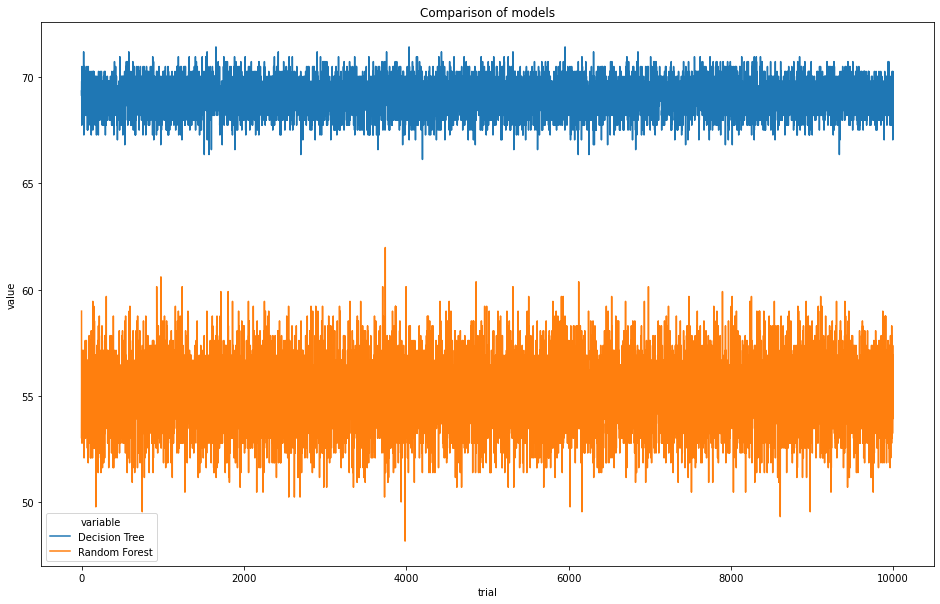

In [17]:
# figure out how to use index-based words in sklearn 
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tokenizing-text-with-scikit-learn

import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

# supress warnings
w.filterwarnings('ignore')

num_simulations = 10000
# results = pd.DataFrame(columns=['trial','no_words','words_ordinal','words_onehot'])
results = pd.DataFrame()
dectree = DecisionTreeClassifier()
ranfore = RandomForestClassifier(n_estimators=17)

def feature_selection(X,y):
    # initial fit
    dectree.fit(X, y)
    model = SelectFromModel(dectree, prefit=True)
    X_new = model.transform(X)
    return X_new

def model_evaluation(prepped_df, model):
    """runs split decision tree model and returns percent of matches"""
    # separate predictors and response
    X = prepped_df.drop(['Purchase Date','Purchase Time','Payment_Method','Verification Date', 'Content', 'Category','PT_total_seconds','Payment_Method_Cat', 'Category_Cat', 'Content'], axis=1)
    y = prepped_df['Category_Cat'].copy()
    
    # Feature selection
    X_new = feature_selection(X, y)

    # test train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return (sum(predictions == y_test.array) / len(predictions)) * 100

# run 1,000 simulations for each dataset, and see which has the best misclassification rate

for i in range(num_simulations):
    # no_words = decision_tree_results(df)
    # words_ordinal = decision_tree_results(dff)
    decisiontree = model_evaluation(mlb_df, dectree)
    randomforest = model_evaluation(mlb_df,ranfore)
    #results = results.append({'trial':i,'no_words':no_words,'words_ordinal':words_ordinal,'words_onehot':words_onehot}, \
    #                         ignore_index=True)
    results = results.append({'trial':i,'Decision Tree':decisiontree,'Random Forest':randomforest}, \
                            ignore_index=True)

# pivot dataframe to use seaborn hue

results_melted = pd.melt(results,id_vars=['trial'])

# plot results in graph
plt.figure(figsize=(16,10))
sns.lineplot(x='trial',y='value',hue='variable',data=results_melted)
plt.title('Comparison of models')

In [ ]:
# upload historic data and train decision tree model 
# upload new data, clean, encode and categorize using model
# review decision tree's categorization against my own
# add new encoded data to historic data
# aggregate new data by category and upload as new sheet to budget